# Boston Housing

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import statsmodels.api as smf
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

Use `load_boston` to load the Boston Housing Dataset.
You must create a Linear Regression model fitted to this data to predict house prices.

- Check the data for nulls
- Explore the data, distributions, correlations.
- Take that into mind when choosing the features for your model.
- Watch out for colinearity.
- Split your data into train and test. [Check out how!](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- Measure the goodness of your fit! $R^2$, $RMSE$, etc.
- Try to make it better.
- Do your own research. Checkout both sklearn and statsmodels, get a feel of both.
- Have fun.


## Loading data & Exploring

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

#### Checking for column names

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### Checking the description of the dataset

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bost = pd.DataFrame(boston.data)

In [8]:
bost.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Changing column names

In [9]:
bost.columns = boston.feature_names

In [10]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Checking for null values

In [11]:
bost.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

- There are no null values, so no need to drop row with missing data

#### Checking for correlation

In [12]:
corr = bost.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


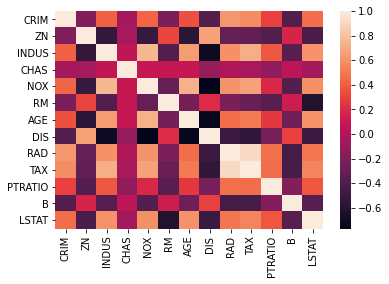

In [13]:
sns.heatmap(corr);

#### Predicting house prices

Analyzing the df I realise that there is no column "PRICE", in order to predict the house prices. This is due to the fact that the target column is available in other attribute: "TARGET".

In [14]:
boston.target.shape

(506,)

Since it has the same number of rows as the original dataset, let's add it:

In [15]:
bost["PRICE"] = boston.target
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now that we have the column "PRICE", we can dive into the analysis

## Analysis

First, let's check for the basic statistics' summary

In [16]:
bost.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Observations**:
- We know that in average, people that buy houses in Boston have in average 68 years old, with a standard deviation of 28 (40 to 96 yo). This data already tells us a few things (such that the average age is pretty elevated, which could mean that either houses are very expensive, or only older people are interested in buying, etc). Before jumping into conclusions, however, let's keep exploring.

### Train-test

Let's split the dataset and separate the column "PRICE" in order to have the target values on one side, and the predictor values on another.

In [17]:
X = bost.drop("PRICE",axis=1)
Y = bost["PRICE"]

Let's set the test data to 33.3% and the train data to 66.6%

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Now that we've got both datasets proportions, let's dive into the Linear Regression

### MLR

In [19]:
lr = LinearRegression(fit_intercept=True)

In [20]:
lr.fit(X_train,Y_train)

LinearRegression()

In [21]:
Y_pred = lr.predict(X_test)

Let's plot

In [22]:
plt.style.use("seaborn-whitegrid")

In [23]:
rcParams["figure.figsize"] = [15,9]

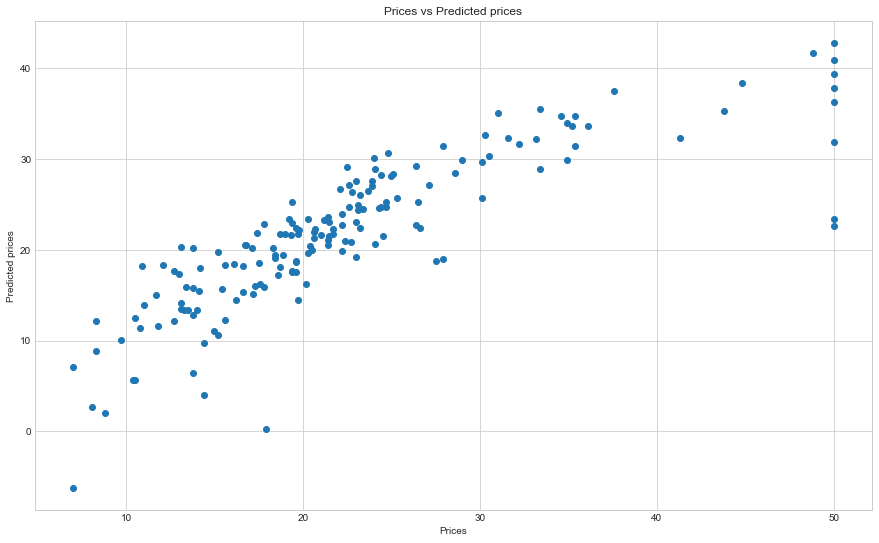

In [24]:
plt.scatter(Y_test, Y_pred)

plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices");

In [30]:
m = lr.coef_
m

array([-1.56381297e-01,  3.85490972e-02, -2.50629921e-02,  7.86439684e-01,
       -1.29469121e+01,  4.00268857e+00, -1.16023395e-02, -1.36828811e+00,
        3.41756915e-01, -1.35148823e-02, -9.88866034e-01,  1.20588215e-02,
       -4.72644280e-01])

In [26]:
b = lr.intercept_
b

32.858932634086024

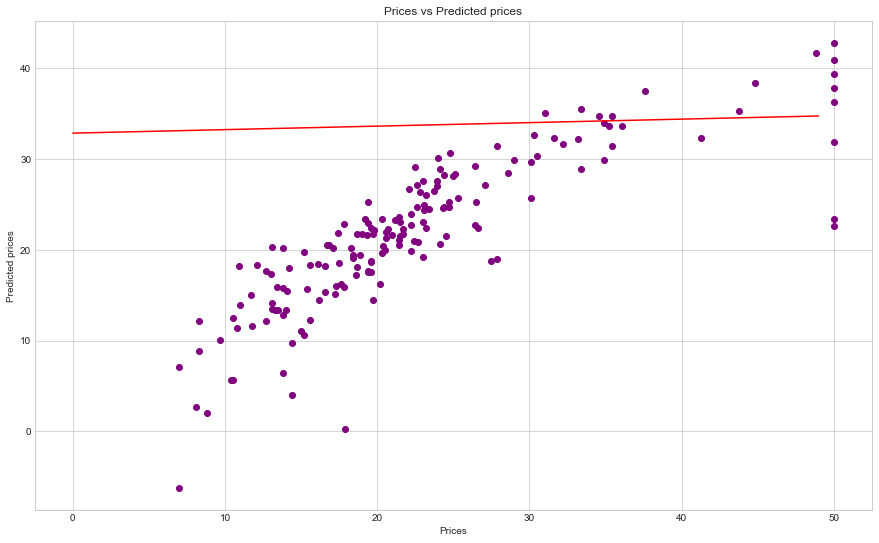

In [27]:
#x = np.arange(0,50)
#y = m*x + b

plt.scatter(Y_test, Y_pred, c="purple")
plt.plot(x,y, c="red")

plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices");

#### Observations:
- We can see a slightly linear trend, yet this model doesn't follow exactly the linear regression model
- Also, there are many outliers, which can make the task of drawing conclusions hard

### Correction

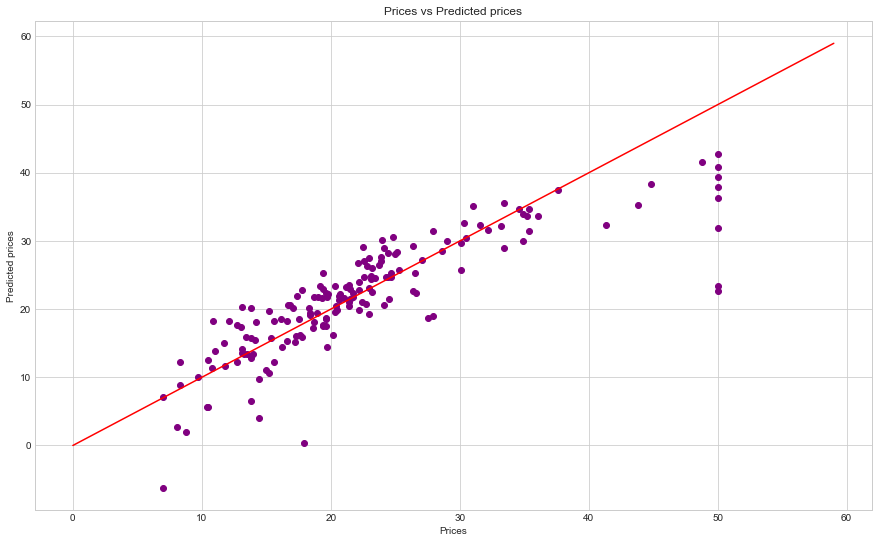

In [32]:
x = np.arange(0,60,1)
plt.scatter(Y_test, Y_pred, c="purple")
plt.plot(x,x, c="red")

plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices");

#### Measuring goodness of fit

In [28]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.530458765974597


- The **Mean Squared Error** measures the squared average distance between the real data and the predicted data. The lesser it is, the closer the fit is to the dataset.
- In this case, the mse is pretty high, whihc indicates that the fit is not very close to the real data.

In [31]:
r2 = r2_score(Y_test, Y_pred)
r2

0.6956551656111605

In [29]:
rmse = mean_squared_error(Y_test, Y_pred)**.5
rmse

5.341391089030515

- The **Root Mean Squared Error**, as the name implies, is the the square root of mse.
- In this particular case, we're going to stick to rmse. The acceptable limits are between 0.2 and 0.75 whihc indicates that the model accurately predicts the real data. However, our rmse is pretty high (5.34) whihc clearly shows that our model is not very accurate.

## Conclusions
- In conclusion, this linear model isn't a great one because it doesn't predict the data accurately.
- Nevertheless, it is a good start, even though it can be improved.

## Future lines of improvement
- Doing more research in order to improve the Linear Regression Model 

### Further resources

- [The internet is your friend](https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c)
- [Scikit-Learn](https://scikit-learn.org)
- [Statsmodels](https://statsmodels.org)